# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Output file
output_data_file = "output_data/cities.csv"

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

In [8]:
print(cities)

['constantia', 'jamestown', 'elburn', 'anadyr', 'georgetown', 'edinburgh of the seven seas', 'blackmans bay', 'iqaluit', 'kourou', 'plettenberg bay', 'grytviken', 'port-aux-francais', 'asia', 'udachny', 'happy valley-goose bay', 'puerto natales', 'papatowai', 'petropavlovsk-kamchatsky', 'nurota', 'hamilton', 'selibaby', 'bethel', 'invercargill', 'acarau', 'west island', 'thompson', 'afaahiti', 'marsh harbour', 'kiruna', 'adamstown', 'cruzeiro do sul', 'weno', 'qaqortoq', 'waitangi', 'klyuchi', 'tura', 'avarua', 'port mathurin', 'murun-kuren', 'fremont', 'qarauyl', 'cabo san lucas', 'puerto penasco', 'la passe', 'fort mcmurray', 'lorengau', 'igrim', 'bredasdorp', 'punta arenas', 'argo', 'saint-pierre', 'dudinka', 'hobyo', 'tanjungtiram', 'malango', 'albany', 'tiksi', 'port elizabeth', 'dhemaji', 'mena', 'shiyan', 'mejit', 'taiohae', 'medicine hat', 'talnakh', 'olavarria', 'shimoda', 'karratha', 'mwene-ditu', 'taseyevo', 'minas de marcona', 'kabare', 'saldanha', 'bilibino', 'severo-yenis

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Create partial query


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind, 
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except Exception as E:
        # print (E)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | elburn
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | kourou
Processing Record 10 of Set 1 | plettenberg bay
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | asia
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | nurota
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | selibaby
Processing Record 2

In [21]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df ={
#     "City": city_data, 
#     "Lat": lat,
#     "Lng": lng,
#     "Max Temp": city_max_temp,
#     "Humidity": city_humidity,
#     "Cloudiness": city_clouds,
#     "Wind Speed": city_wind,
#     "Country": city_country,
#      "Date": city_date}

# Show Record Count
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,17.38,74,50,8.25,RO,1686598715
1,jamestown,42.0970,-79.2353,14.77,82,100,6.71,US,1686598716
2,elburn,41.8923,-88.4723,20.71,43,75,4.12,US,1686598716
3,anadyr,64.7500,177.4833,13.28,58,0,3.00,RU,1686598716
4,georgetown,5.4112,100.3354,29.97,84,20,2.57,MY,1686598591


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/city_weather.csv", index=False, header=True)


In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

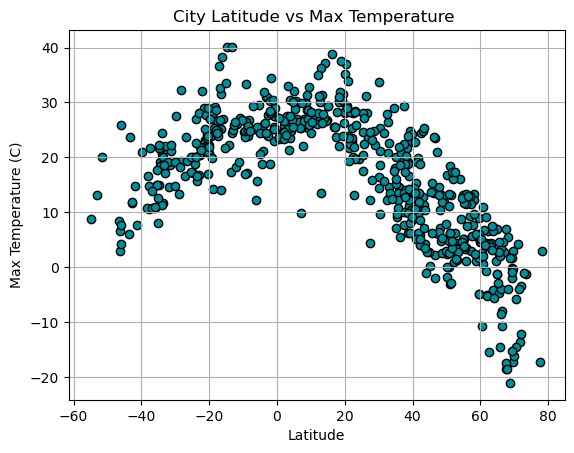

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color = "#008E9B", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature ")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

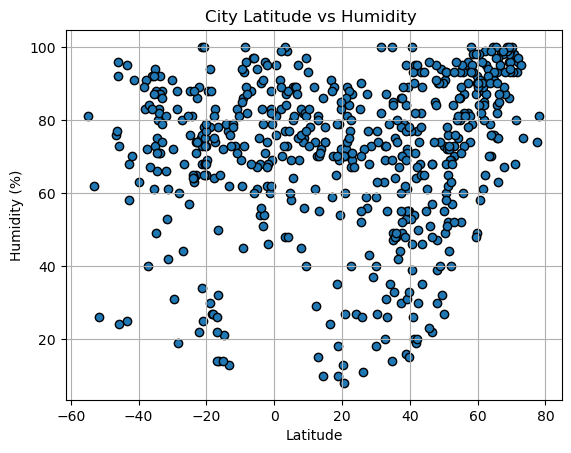

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

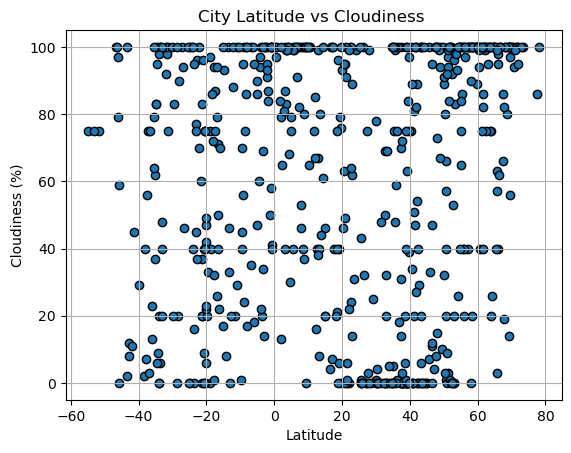

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

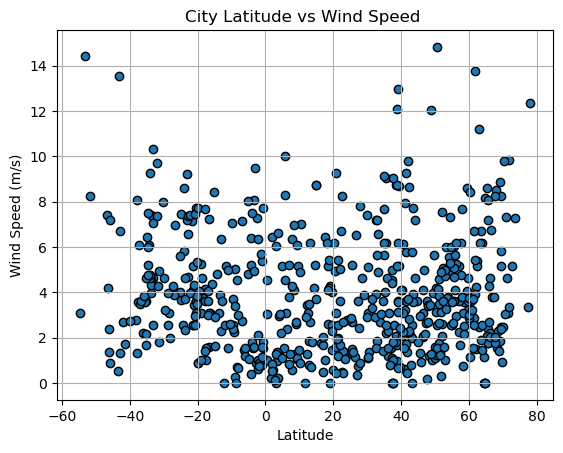

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed ")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates)

SyntaxError: expected ':' (2743097873.py, line 2)

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825364


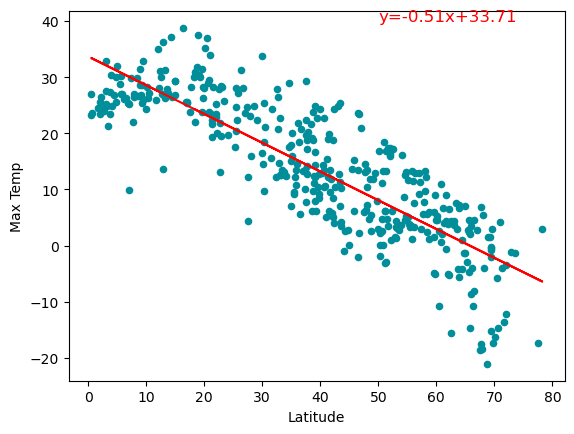

In [42]:
# Linear regression on Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Max Temp", kind="scatter", marker="o", color="#008E9B", xlabel="Latitude", ylabel="Max Temp")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (50, 40), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.6419546065421801


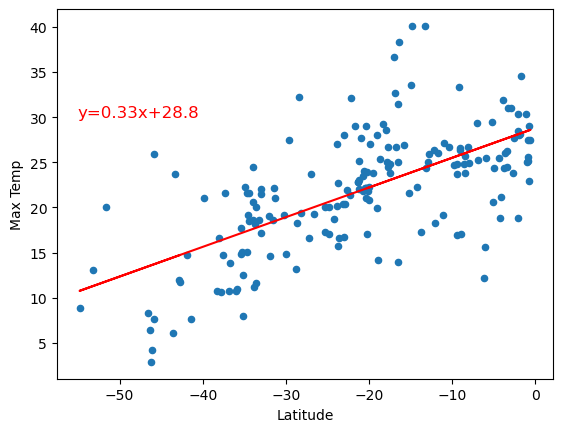

In [43]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Max Temp", kind="scatter",marker="o", xlabel="Latitude", ylabel="Max Temp")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** 
When analysing the plot for the northern hempisphere, the regression line is going in a downward position, hence indicating the negative r-value. This means that the chosen model does fit the data poorly. 

When you look at the southern hemisphere, it is a positive corelation by the line going upwards, positive r-value. This tells you that cities closer to the equator will record higher temperatures and the cities farther from the equator have lower temperatures. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


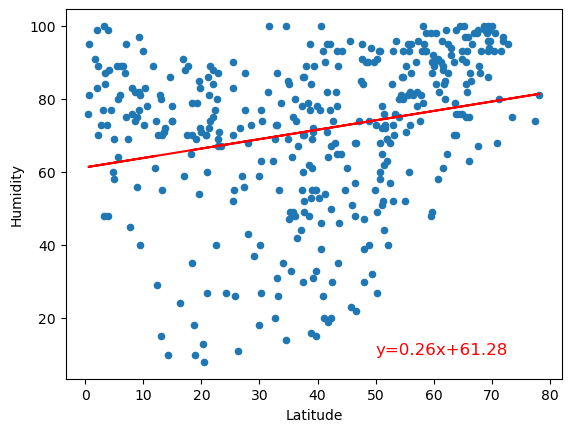

In [44]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Humidity", kind="scatter", marker="o", xlabel="Latitude", ylabel="Humidity")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (50, 10), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.016759316950056818


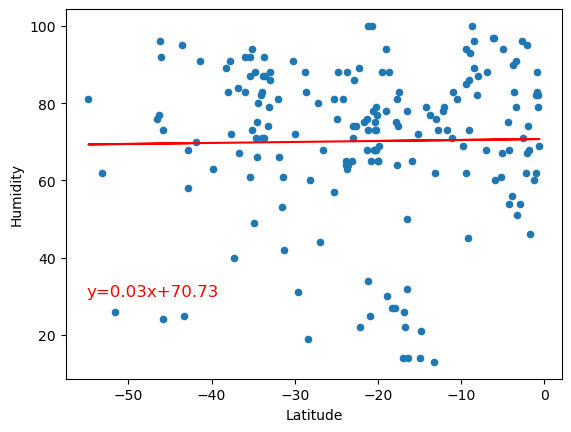

In [45]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Humidity", kind="scatter", marker="o", xlabel="Latitude", ylabel="Humidity")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** 

While comparing the two hemispheres in terms of humidity and latitude, it shows that there is a positive corelation due to the positive r-number. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


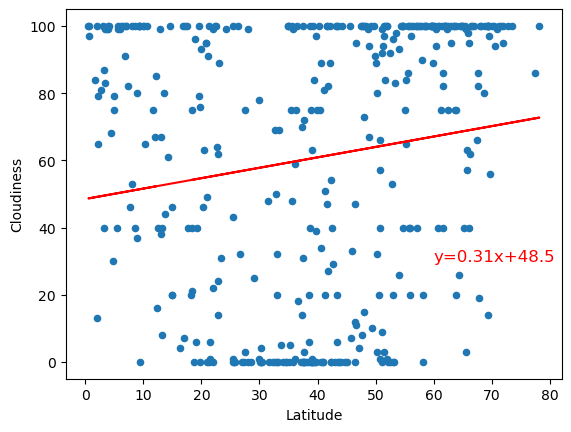

In [46]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Cloudiness", kind="scatter", marker="o",xlabel="Latitude", ylabel="Cloudiness")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (60, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.14341322916643243


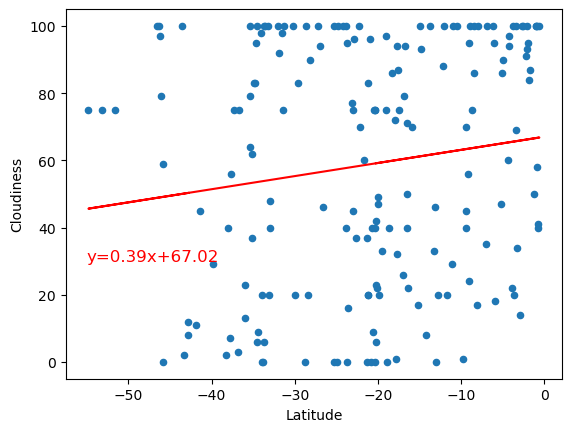

In [47]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Cloudiness", kind="scatter",marker="o", xlabel="Latitude", ylabel="Cloudiness")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** 
While comparing the two hemispheres in terms of cloudiness and latitude, it shows that there is a positive corelation due to the positive r-number. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1743466729090334


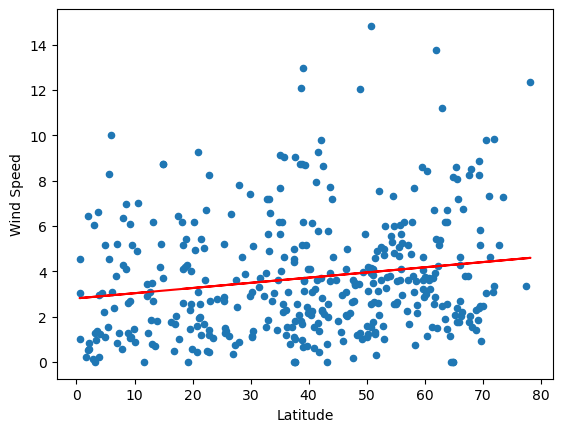

In [48]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"])

regression_line = slope * northern_hemi_df["Lat"] + intercept
regression_line.index = northern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

northern_hemi_df.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", xlabel="Latitude", ylabel="Wind Speed")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (60, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: -0.24947753546264592


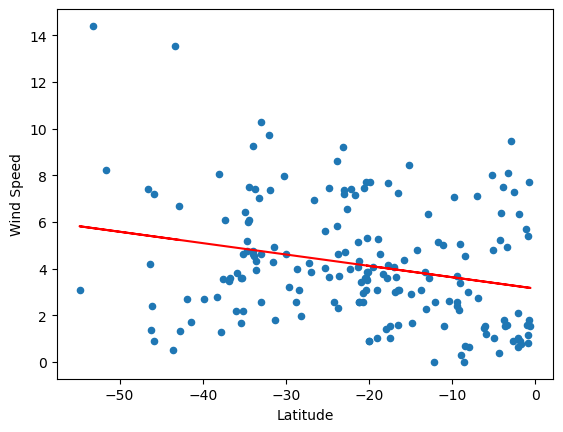

In [49]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"])

regression_line = slope * southern_hemi_df["Lat"] + intercept
regression_line.index = southern_hemi_df["Lat"]
regr_eq = f'y={round(slope,2)}x+{round(intercept,2)}'

southern_hemi_df.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", xlabel="Latitude", ylabel="Wind Speed")
plt.plot(regression_line, color='red')
plt.annotate(regr_eq, (-55, 30), fontsize = 12, color='r')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** 

When comparing latitude and wind speed i would say there is little evidence in corelation due to the r- number being positive in the northern hemisphere and negative in the southern hemisphere. The r-value is also lower than 0.15 